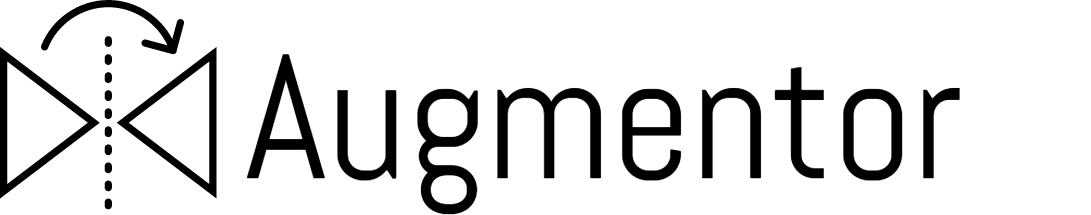

In [1]:
#!pip install Augmentor

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import Augmentor
import os
import numpy as np
from glob import glob
import PIL

In [13]:
input_images_path = './data/images/volcano'
output = "output"

In [14]:
p = Augmentor.Pipeline(input_images_path,output)

Initialised with 1 image(s) found.
Output directory set to ./data/images/volcano/output.

In [15]:
#Let us add few operations. 
#probability here represents the probabiity of operation being applied
p.rotate90(probability=0.5)
p.rotate270(probability=0.5)
p.flip_left_right(probability=0.8)
p.flip_top_bottom(probability=0.3)
p.random_erasing(probability=0.5, rectangle_area = 0.2)
p.crop_random(probability=1, percentage_area=0.5)
p.resize(probability=1.0, width=120, height=120)

In [21]:
#Sample images from the pipeline 
p.sample(3)

Processing <PIL.Image.Image image mode=RGB size=120x120 at 0x12735BF28>: 100%|██████████| 3/3 [00:00<00:00, 60.77 Samples/s]


In [22]:
def grid_display(list_of_images, list_of_titles=[], no_of_columns=6, figsize=(10,10)):

    fig = plt.figure(figsize=figsize)
    column = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        plt.imshow(list_of_images[i])
        plt.axis('off')
        if len(list_of_titles) >= len(list_of_images):
            plt.title(list_of_titles[i])

In [23]:
#Show a single image
def show_image(file_path):
    img = PIL.Image.open(file_path)
    plt.imshow(img)

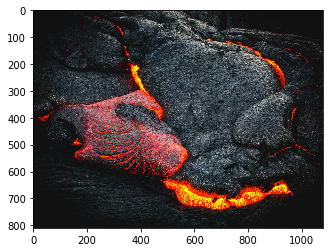

In [24]:
#original image
file = os.path.join(input_images_path, "photo-volcano.jpeg")
show_image(file)

./data/images/volcano/output/*.jpeg


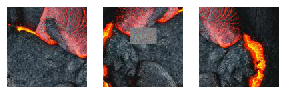

In [25]:
#Generated samples
output_images=os.path.join(input_images_path, output, "*.jpeg") 
print(output_images)
images = [ PIL.Image.open(f) for f in glob(output_images) ]
grid_display(images)

### Augmenting per class

In [26]:
pipelines = {}

In [27]:
sec_input_images_path = './data/images/mountain'

In [28]:
pipelines['volcano'] = Augmentor.Pipeline(input_images_path)
pipelines['mountain'] = Augmentor.Pipeline(sec_input_images_path)

Initialised with 1 image(s) found.
Output directory set to ./data/images/volcano/output.Initialised with 1 image(s) found.
Output directory set to ./data/images/mountain/output.

In [29]:
pipelines['volcano'].rotate(probability=0.5, max_left_rotation=5, max_right_rotation=5)
pipelines['volcano'].random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)

pipelines['mountain'].flip_left_right(probability=0.5)
pipelines['mountain'].flip_top_bottom(probability=0.5)

In [30]:
for p in pipelines.values():
    print("Class %s has %s samples." % (p.augmentor_images[0].class_label, len(p.augmentor_images)))
    p.sample(3)

Executing Pipeline:   0%|          | 0/3 [00:00<?, ? Samples/s]

Class volcano has 1 samples.


Processing <PIL.Image.Image image mode=RGB size=1080x810 at 0x124819828>: 100%|██████████| 3/3 [00:00<00:00,  9.90 Samples/s]
Executing Pipeline:   0%|          | 0/3 [00:00<?, ? Samples/s]

Class mountain has 1 samples.


Processing <PIL.Image.Image image mode=RGB size=2512x1413 at 0x124819748>: 100%|██████████| 3/3 [00:00<00:00, 12.05 Samples/s]


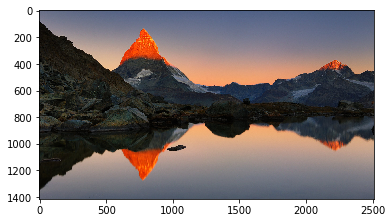

In [31]:
#original image
file = os.path.join(sec_input_images_path, "photo-mountain.jpeg")
show_image(file)

./data/images/mountain/output/*.jpeg


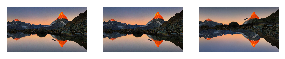

In [32]:
#Generated samples
output_images=os.path.join(sec_input_images_path, output, "*.jpeg") 
print(output_images)
images = [ PIL.Image.open(f) for f in glob(output_images) ]
grid_display(images)